<div style="display:flex; border-bottom:4px solid gray; background-color: white; padding: 10px;">
    <div>
        <h2 style="margin:10px 0px 0px 0px;">Master Thesis - Spring 2023</h2>
        <h4 style="margin:10px 10px 10px 0px;"><i>Artificial Intelligence - Data Science</i></h4>
    </div>
    <img src="https://raw.githubusercontent.com/JABE22/Image/main/Logos/logo_ural-federal-university.png" style="width:300px; height:150px; margin-right: 25px;" align='right' />
</div>
<h4 style="margin-top:10px; text-align:right; font-size: 20px; margin-right: 25px;"> Jarno Matarmaa - 05.2023 - Version-2.0-github</h4>

# Sport Activity Classification using Standard CML Models and Time Series Analysis
### Part (3/3), SAC Analysis for TSC

This part only reads TSC results from the saved files and visualizes them. Here we do not perform any classification.

---

**TASKS**

**CHANGE LOG**

**QUESTIONS**

---

<a id="0"></a> <br>
## I - Table of Contents

#### [1 - Data import and preview](#1)
* [1A - Libraries and file paths](#11)
* [1B - Explore orginal data](#12)

#### [2 - Classification Analysis](#2)
* [2A - Univariate TSC](#21)
    * [2A.1 - Classification results](#211)
    * [2A.2 - Misclassification analysis](#212)
    * [2A.3 - Model correlation](#213)
* [2B - Multivariate TSC](#22)
    * [2B.1 - MUSE](#221)
    * [2B.2 - Ensemble](#222)

---

<a id="1"></a> <br>
## [▲](#0) 1 - Data import and preview

<a id="11"></a> <br>
### [▲](#1) 1A - Libraries and file path setup

In [1]:
# System tools
import os
import sys
# File structure
from directory_structure import Tree
# Data manipulation tools
import pandas as pd
import numpy as np
import statistics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline
# In case we need to do some slight data processing
from sktime.datatypes._panel._convert import from_2d_array_to_nested
from sklearn.preprocessing import StandardScaler

C:\Users\jarno\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
plt.style.use('./styles/plotstyles.mplstyle')
cmap = sns.color_palette("muted", 10)
THEMA_COLOR = cmap[9]
#plt.style.use('default')
#sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

#### File path setup

- Data is supposed to be in the folder path `DATA/`

In [3]:
DATA_PATH = "C:/Users/jarno/OneDrive - УрФУ/STUDIES/MASTER/DATA/"
DATA_PATH_ORG = "C:/Users/jarno/OneDrive - УрФУ/STUDIES/DesignWorkshop/DesignWorkshopProject/DATA/CSVDATA/SET1/"

In [4]:
results_filepath = DATA_PATH + 'results/'
preds_filepath = DATA_PATH + 'predictions/'

Workspace DATA folder content

In [5]:
path = Tree(DATA_PATH, absolute=False)
print(path)

📂 DATA
|_📁 case_data
|_📁 data_arrays
|_📁 predictions
|_📁 results
|_📁 results_S-CML
|_📁 results_S-CML_in_TSC
|_📄 ALT-DATA_std_1160x69
|_📄 HR-DATA_std_1160x69
|_📄 SPD-DATA_std_1160x69
|_📄 TARGET-DATA_1160x1
|_📄 TARGET-DATA_1160x69


<a id="12"></a> <br>
### [▲](#1) 1B - Explore the Original Data

In [6]:
entries = os.listdir(DATA_PATH_ORG)
len(entries)

298

In [7]:
np.sort(entries)[-1]

'activity_types.csv'

In [8]:
df_sample = pd.read_csv(DATA_PATH_ORG + entries[0], delimiter=';', index_col=0)
df_sample.shape

(2607, 8)

In [9]:
df_sample

,Latitude,Longitude,Altitude,Distance,HeartRate,Speed,Cadence,Watts
Datetime,,,,,,,,
2020-05-22 16:02:26+00:00,61.432525,23.803976,124.800003,0.000000,79,0.653,None,None
2020-05-22 16:02:27+00:00,61.432525,23.803976,124.800003,0.000000,77,0.653,None,None
2020-05-22 16:02:32+00:00,61.432408,23.804176,124.800003,26.990000,76,0.000,None,None
2020-05-22 16:02:36+00:00,61.432521,23.804282,124.800003,48.580002,75,0.000,None,None
2020-05-22 16:02:38+00:00,61.432550,23.804260,124.800003,49.779999,82,0.000,None,None
...,...,...,...,...,...,...,...,...
2020-05-22 18:14:44+00:00,61.432475,23.804577,124.800003,45934.988281,89,0.000,None,None
2020-05-22 18:14:52+00:00,61.432459,23.804565,124.800003,45937.031250,86,0.000,None,None
2020-05-22 18:14:55+00:00,61.432468,23.804571,124.800003,45937.851562,90,0.000,None,None


In [10]:
df_sample.index = pd.to_datetime(pd.Series(df_sample.index))

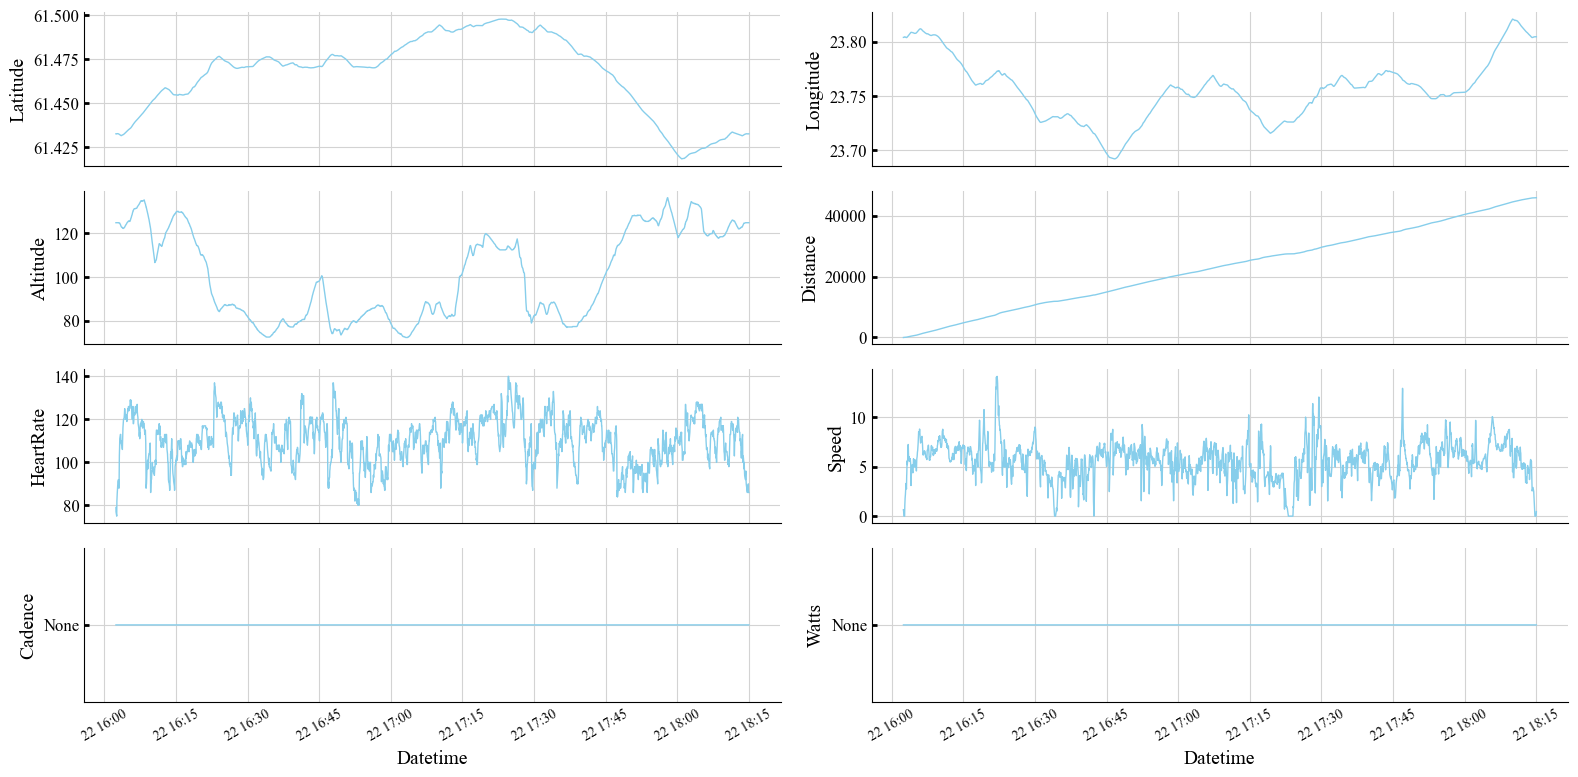

In [11]:
df_plot = df_sample.copy()

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(16, 8))

for i, ax in enumerate(fig.axes):
    sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
    ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.grid()
        
fig.tight_layout()
plt.show()

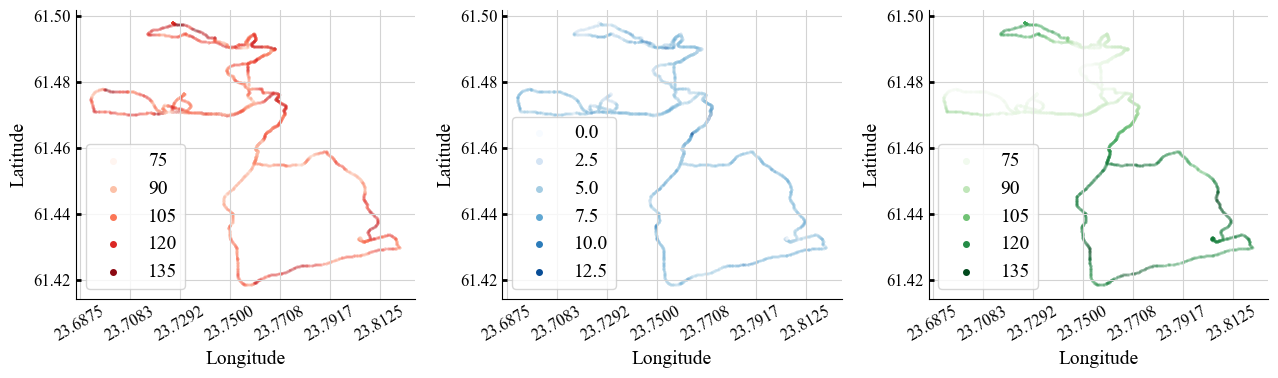

In [12]:
ncols = 3
nrows = 1

df_plot.columns
query_cols = ['HeartRate','Speed','Altitude']
colors = ["Reds","Blues","Greens"]
cols_index = [df_plot.columns.get_loc(col) for col in query_cols]

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(13, 4))

for i, ax in enumerate(fig.axes):
    sns.scatterplot(data=df_plot[[query_cols[i],'Longitude','Latitude']].reset_index(),
                    x='Longitude', y='Latitude', 
                    hue=query_cols[i], 
                    size=15, 
                    marker='+', 
                    palette=colors[i], 
                    alpha=0.7,
                    ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(labels=labels[:-1], handles=handles)
    ax.tick_params(axis="x", rotation=30, length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.grid()
        
fig.tight_layout()
plt.show()

Text(0.5, 0, 'Speed')

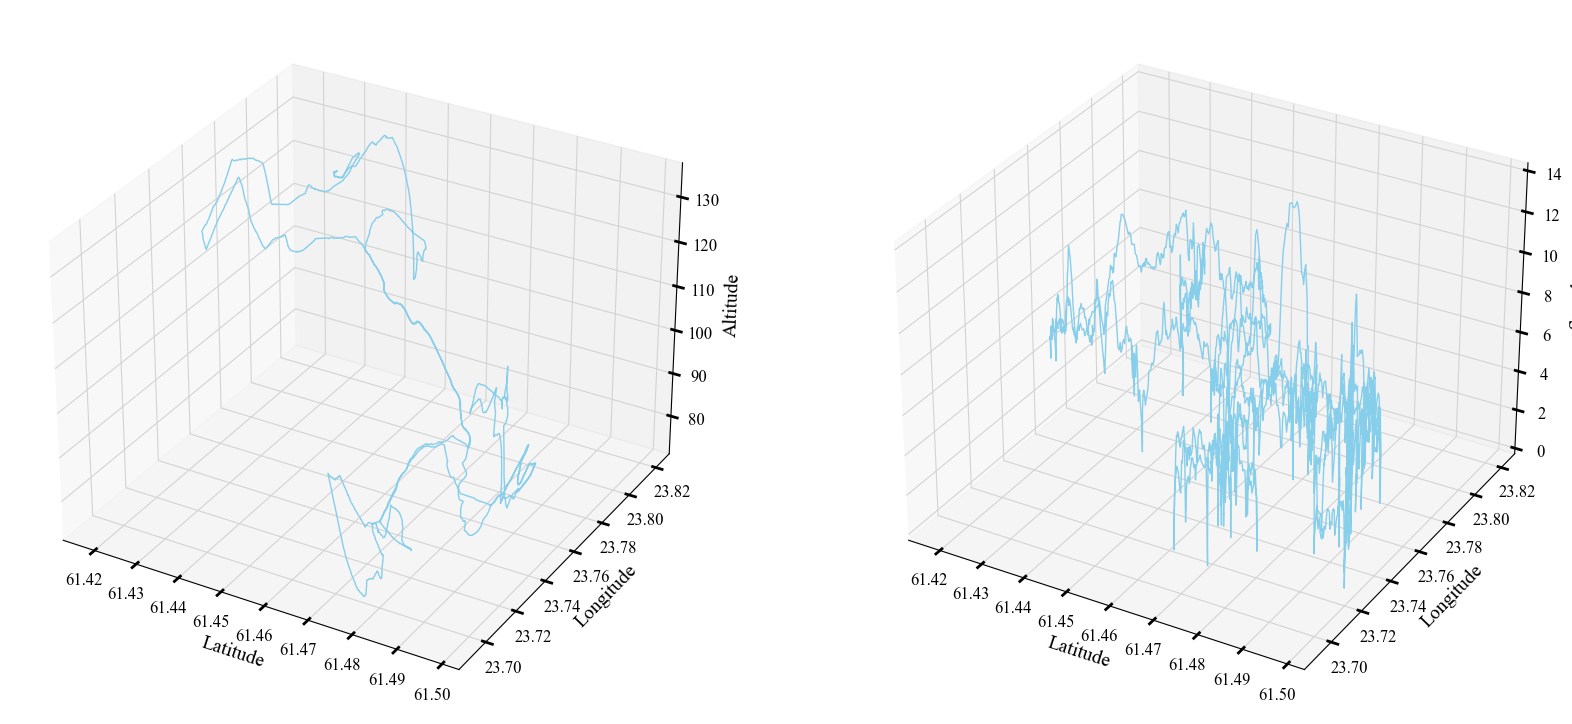

In [13]:
fig = plt.figure(figsize=(20,10), facecolor='white')
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot3D(df_sample['Latitude'], df_sample['Longitude'], df_sample['Altitude'], lw=1)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Longitude')
ax1.set_zlabel('Altitude')
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot3D(df_sample['Latitude'], df_sample['Longitude'], df_sample['Speed'], lw=1)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Longitude')
ax2.set_zlabel('Speed')

<a id="13"></a> <br>
### [▲](#1) 1C - Interlaced Signal Description

Generate proper data

In [14]:
col_names = ['HeartRate','Speed','Altitude']
is_sample = df_sample[col_names].copy()
is_sample.index = is_sample.index.time

scaler = StandardScaler()
std_data = scaler.fit_transform(is_sample)
is_sample_std = is_sample.copy()
is_sample_std[col_names] = std_data

# Sequence manipulation
signal = is_sample_std.values.reshape(-1,1)  # Generates interlation operation: (69,3) => (207,1) 
signal = pd.DataFrame(np.squeeze(np.asarray(signal)), columns=['Interlaced Signal'])

In [15]:
# Data for a signle segment (different scale)
segment = is_sample.iloc[100:169,:]
segment_std = is_sample_std.iloc[100:169,:]
# Sequence manipulation
segment_signal = segment_std.values.reshape(-1,1)  # Generates interlation operation: (69,3) => (207,1) 
segment_signal = pd.DataFrame(np.squeeze(np.asarray(segment_signal)), columns=['Interlaced Signal'])

Plot data

Text(0, 0.5, 'Standard value')

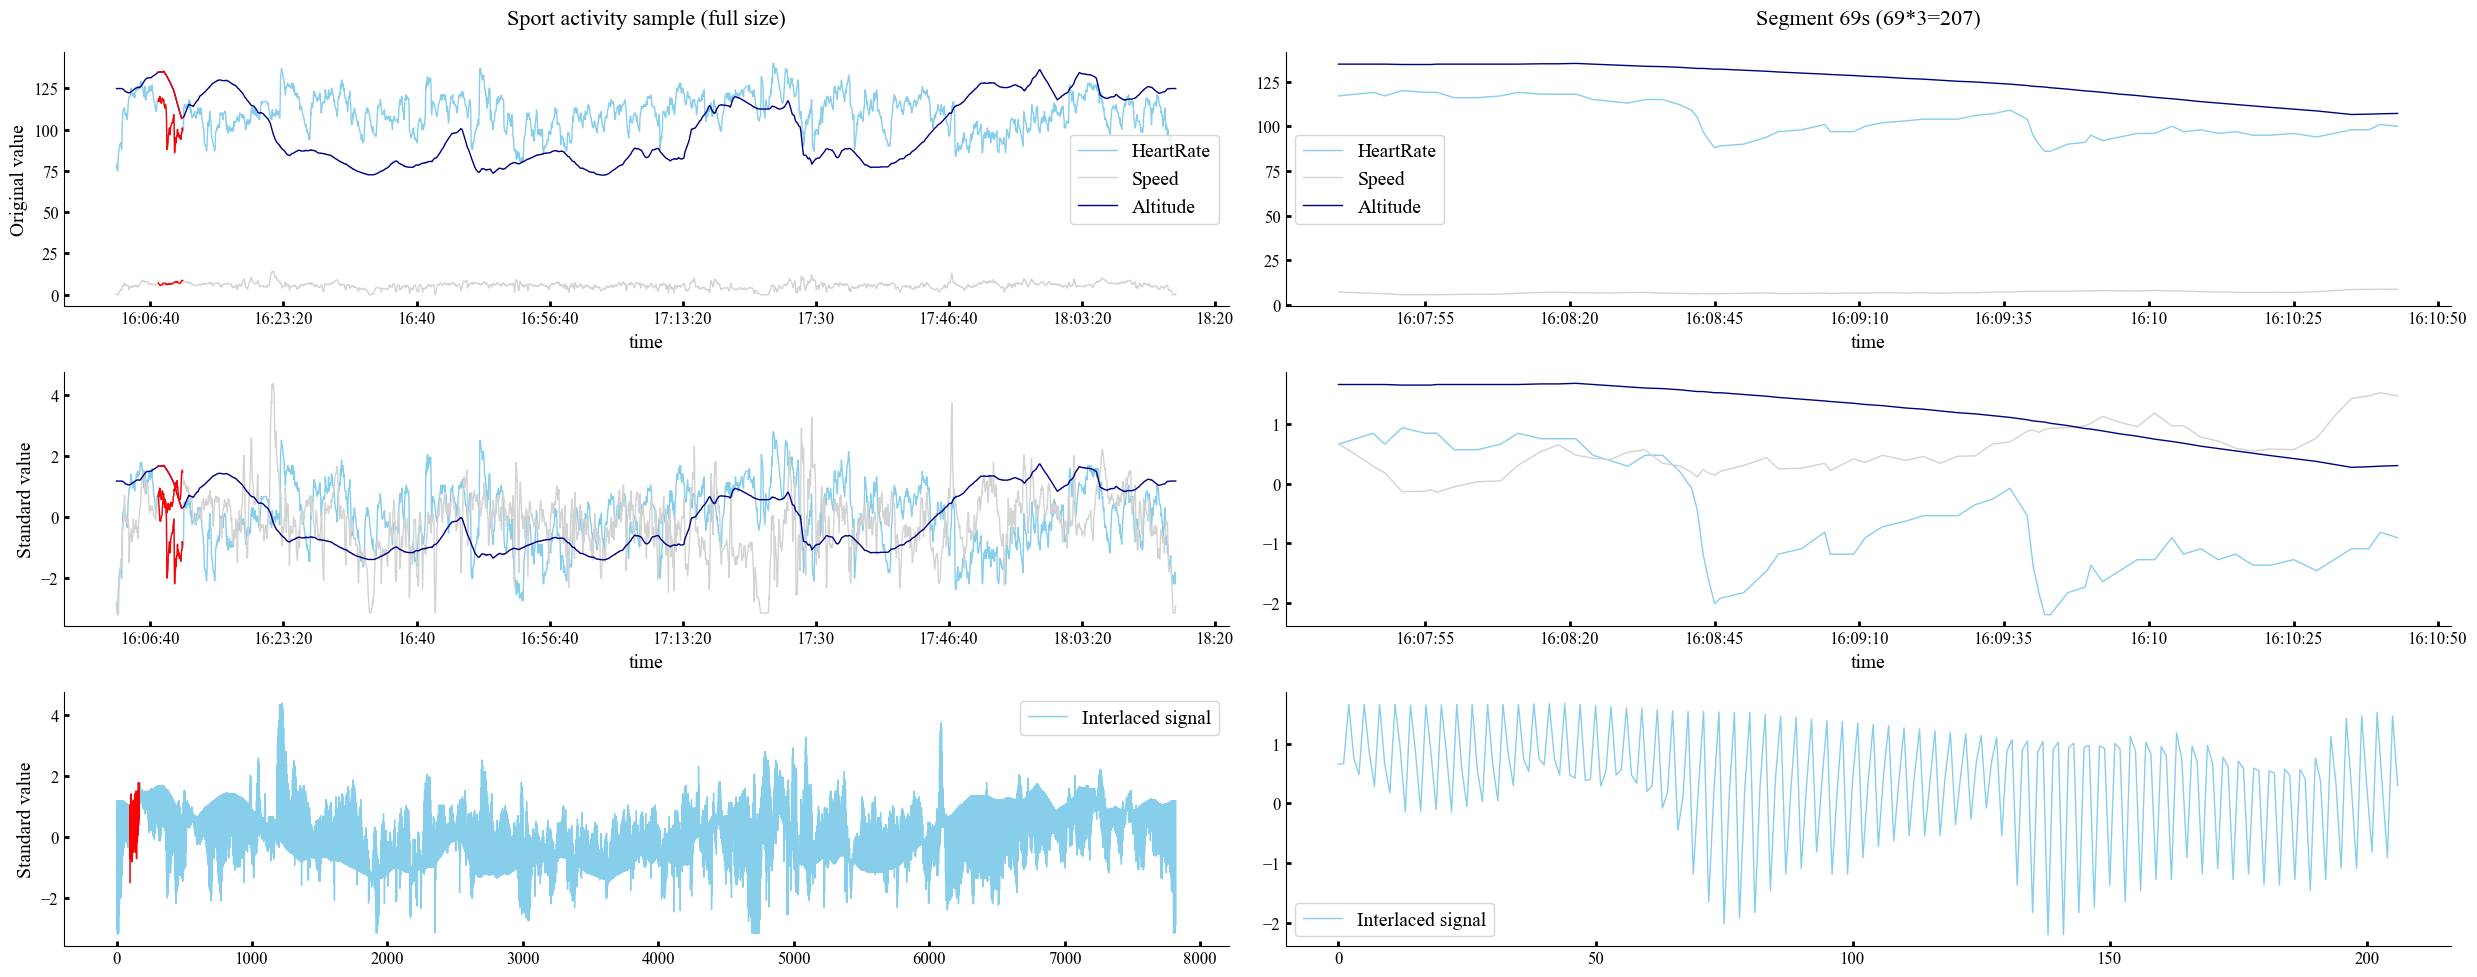

In [16]:
fig, axs = plt.subplots(3,2,figsize=(25,10), tight_layout=True)
is_sample.plot(ax=axs[0,0])
is_sample_std.plot(ax=axs[1,0])
signal.plot(ax=axs[2,0])
# Plot segment
is_sample.iloc[100:169,:].plot(ax=axs[0,0], color='r')
is_sample_std.iloc[100:169,:].plot(ax=axs[1,0], color='r')
signal.iloc[100:169,:].plot(ax=axs[2,0], color='r')

segment.plot(ax=axs[0,1])
segment_std.plot(ax=axs[1,1])
segment_signal.plot(ax=axs[2,1])

# Set labels and ticks
axs[0,0].set_title('Sport activity sample (full size)', pad=20)
axs[0,1].set_title('Segment 69s (69*3=207)', pad=20)
axs[0,0].legend(labels=col_names, loc='center right')
axs[1,0].legend().remove()
axs[2,0].legend(labels=['Interlaced signal'], loc='upper right')
axs[0,1].legend(labels=col_names, loc='center left')
axs[1,1].legend().remove()
axs[2,1].legend(labels=['Interlaced signal'], loc='lower left')
axs[0,0].set_ylabel('Original value')
axs[1,0].set_ylabel('Standard value')
axs[2,0].set_ylabel('Standard value')

In [17]:
df_sample[['HeartRate','Speed','Altitude']].index.time

array([datetime.time(16, 2, 26), datetime.time(16, 2, 27),
       datetime.time(16, 2, 32), ..., datetime.time(18, 14, 55),
       datetime.time(18, 14, 57), datetime.time(18, 15, 2)], dtype=object)

<a id="2"></a> <br>
## [▲](#0) 2 - Classification Analysis

**Classification result examples**

<div style="display: block; padding: 15px; background-color: skyblue; height: auto; border-radius: 5px; width: 95vw;">
    <h3 style="font-size: 22px;"><b>Results A</b><br>
    X: (232, 424)  y: (232,)<br>
    Train: (185, 424) (185,) Test: (47, 424) (47,)<br>
    Execution time: ~80 min<br></h3>
    <p style="font-size: 18px;">The following results are with minimum sequence length of 500 (for limit 500 the shortest sequence is 524).<br>Segments are from the interval [100-524].<br>Because we use minimum activity length as the sequence end index for all the activities, our practical equalized sequence length is 424</p>
</div>

![Results232x424_test47x424](img/results_datasetup_a.png)

<div style="display: block; padding: 15px; background-color: skyblue; height: auto; border-radius: 5px; width: 95vw;">
    <h3 style="font-size: 22px;"><b>Results B</b><br>
    X: (1160, 207)  y: (1160,)<br>
    Train: (928, 207) (928,) Test: (232, 207) (232,)<br>
    Execution time: ~240 min<br></h3>
    <p style="font-size: 18px;">The following results are with minimum sequence length of 500 from the original sequences (for limit 500 the shortest sequence is 524).<br>
    Sequenced data with their varying original lengths is then segmented using 5x69 splits from the interval [100, 445], shape = (1160, 69, 3).<br>
    After flattening three dimensional (3 features) data to a single "multivariate" signal in length of 3x69, dataset is created using start index 0 and length 207, shape = (1160, 207),<br>
    and thus using the whole <i>segmented data</i> (there remains a possibility to further cut data when using  <i>init_data()</i> function)<br><br>
    <b>Note: </b>In this study project <i>segmented data</i> refers always to the "data augmentation". That means, splitting single activity to a several equal length segments instead of getting only one segment per activity</p>
</div>

![Results1160x207_test232x207](img/results_datasetup_b.png)

<a id="21"></a> <br>
### [▲](#1) 2A - Univariate TSC

<a id="211"></a> <br>
#### [▲](#21) 2A.1 - Classification results

**Functions**

In [18]:
'''
Creates list of column names according to the parameters
- @general: Start of the column name
- @num: Identification number for column
Output for function call create_col_names(general='Score', num=3) 
=> ['Score 1','Score 2', 'Score 3']
'''
def create_col_names(general, num, info=False):
    col_names = []
    for i in range(1,num+1):
        col_names.append(general + str(i))
    
    if info: print("Columns created: ", col_names)
    
    return col_names

**Read files from the directory**

* Let's pick some relevant file with desired content, classification execution from `30.3.2023 - 14:16`
* This file has MUSE and ENSEMBLE results, inserted manually using copy paste

In [19]:
results_csv_filename = 'results_datasetup_b_D20230330_T1416.csv'

In [20]:
# Read results from the csv file
results_from_csv = pd.read_csv(results_filepath + results_csv_filename)

# Use appreviations instead of long model names
apprvs = ['TSF','STSF','RISE','RIC','STC','kNN-TS','CTSF','WEASEL']
clfs = results_from_csv['Classifier']
model_apprvs = dict(zip(clfs, apprvs))
results_from_csv.replace(to_replace=model_apprvs, inplace=True)

**Print result tables**

In [21]:
# Statistics for the scores
ITERS = 3
score_col_names = create_col_names('Score_', ITERS)
results_from_csv['Score Best'] = results_from_csv[score_col_names].max(axis=1)
results_from_csv['Variance'] = (results_from_csv[score_col_names].max(axis=1)-results_from_csv[score_col_names].min(axis=1))/2
results_from_csv['Std'] = results_from_csv[score_col_names].std(axis=1)
results_from_csv['Score Avg'] = results_from_csv[score_col_names].mean(axis=1)
# Sort values
sorted_results = results_from_csv.sort_values(by='Score Best', ascending=False)
# Style setup
format_cols = ['Train(t)','Test(t)','Score_1','Score_2','Score_3','mse','f1','roc-auc','Score Best','Variance','Std','Score Avg']
sorted_results.style.background_gradient(cmap=sns.light_palette("skyblue", as_cmap=True))\
    .set_properties(subset=['Score Best'], **{'font-weight': 'bold'})\
    .format(precision=3)\
    .highlight_max(format_cols, props='color:black;background-color:skyblue;', axis=0)

,Classifier,Type,Train(t),Test(t),Score_1,Score_2,Score_3,mse,f1,roc-auc,Score Best,Variance,Std,Score Avg
8,MUSE,sktime,279.789,34.747,0.957,0.966,0.961,0.060,0.966,0.994,0.966,0.004,0.004,0.961
9,ENSEMBLE,sktime,829.518,38.091,0.961,0.957,0.957,0.052,0.961,0.995,0.961,0.002,0.002,0.958
1,STSF,sktime,108.528,5.973,0.922,0.931,0.922,0.108,0.931,0.990,0.931,0.004,0.005,0.925
3,RIC,sktime,588.829,40.834,0.914,0.927,0.918,0.099,0.927,0.985,0.927,0.006,0.007,0.920
7,WEASEL,sktime,139.519,11.410,0.918,0.918,0.918,0.159,0.918,0.981,0.918,0.000,0.000,0.918
2,RISE,sktime,243.889,38.086,0.905,0.901,0.901,0.198,0.905,0.980,0.905,0.002,0.002,0.902
0,TSF,sktime,22.269,2.763,0.901,0.901,0.897,0.099,0.901,0.979,0.901,0.002,0.002,0.899
4,STC,sktime,1212.480,78.705,0.897,0.892,0.888,0.129,0.897,0.973,0.897,0.004,0.004,0.892
6,CTSF,sktime,1692.136,182.430,0.888,0.888,0.892,0.121,0.892,0.978,0.892,0.002,0.002,0.889
5,kNN-TS,sktime,5.884,86.924,0.772,0.772,0.772,0.358,0.772,0.829,0.772,0.000,0.000,0.772


Reference results from the CML models (Not the same as used in S-CML part of this report)

In [22]:
# We load some results from our database
results_from_csv_cml = pd.read_csv('DATA/results_S-CML_in_TSC/results')

In [23]:
# Statistics for the scores
score_col_names = create_col_names('Score_', 3)
results_from_csv_cml['Score Best'] = results_from_csv_cml[score_col_names].max(axis=1)
results_from_csv_cml['Variance'] = (results_from_csv_cml[score_col_names].max(axis=1)-results_from_csv_cml[score_col_names].min(axis=1))/2
results_from_csv_cml['Std'] = results_from_csv_cml[score_col_names].std(axis=1)
results_from_csv_cml['Score Avg'] = results_from_csv_cml[score_col_names].mean(axis=1)
# Sort values
sorted_results_cml = results_from_csv_cml.sort_values(by='Score Avg', ascending=False)
# Style setup
format_cols = ['Train(t)','Test(t)','Score_1','Score_2','Score_3','mse','f1','roc-auc','Score Best','Variance','Std','Score Avg']
sorted_results_cml.style.background_gradient(cmap=sns.light_palette("skyblue", as_cmap=True))\
    .set_properties(subset=['Score Best'], **{'font-weight': 'bold'})\
    .format(precision=3)\
    .highlight_max(format_cols, props='color:black;background-color:skyblue;', axis=0)

,Classifier,Type,Train(t),Test(t),Score_1,Score_2,Score_3,mse,f1,roc-auc,Score Best,Variance,Std,Score Avg
7,GB,sklearn,19.023,0.006,0.918,0.918,0.918,0.082,0.918,nan,0.918,0.000,0.000,0.918
5,MLP,sklearn,3.132,0.007,0.909,0.909,0.918,0.082,0.918,nan,0.918,0.004,0.005,0.912
9,RF,sklearn-tree,1.369,0.023,0.905,0.905,0.897,0.095,0.905,0.980,0.905,0.004,0.005,0.902
4,SVM,sklearn,0.058,0.033,0.884,0.884,0.884,0.129,0.884,nan,0.884,0.000,0.000,0.884
8,DT,sklearn-tree,0.189,0.005,0.875,0.866,0.871,0.125,0.875,0.898,0.875,0.004,0.004,0.871
3,LR,sklearn,0.095,0.009,0.853,0.853,0.853,0.172,0.853,nan,0.853,0.000,0.000,0.853
0,kNN,sklearn,0.004,0.160,0.849,0.849,0.849,0.164,0.849,nan,0.849,0.000,0.000,0.849
6,LDA,sklearn,0.214,0.013,0.789,0.789,0.789,0.224,0.789,nan,0.789,0.000,0.000,0.789
1,G-NB,sklearn,0.015,0.007,0.784,0.784,0.784,0.216,0.784,nan,0.784,0.000,0.000,0.784
2,QDA,sklearn,0.051,0.013,0.573,0.573,0.573,0.427,0.573,nan,0.573,0.000,0.000,0.573


Generate compilation table

In [24]:
comp_df = pd.concat((results_from_csv, results_from_csv_cml), axis=0, ignore_index=True)

In [25]:
comp_df['Time(total)'] = comp_df['Train(t)']+comp_df['Test(t)']
comp_df['Time(total)'] = (comp_df['Time(total)']-comp_df['Time(total)'].min())/(comp_df['Time(total)'].max()-comp_df['Time(total)'].min())


comp_df = comp_df.sort_values(by='Score Best', ascending=False)
comp_df.style.background_gradient(cmap=sns.light_palette("skyblue", as_cmap=True))\
    .set_properties(subset=['Score Best'], **{'font-weight': 'bold'})\
    .format(precision=3)\
    .highlight_max(format_cols, props='color:black;background-color:skyblue;', axis=0)

,Classifier,Type,Train(t),Test(t),Score_1,Score_2,Score_3,mse,f1,roc-auc,Score Best,Variance,Std,Score Avg,Time(total)
8,MUSE,sktime,279.789,34.747,0.957,0.966,0.961,0.060,0.966,0.994,0.966,0.004,0.004,0.961,0.168
9,ENSEMBLE,sktime,829.518,38.091,0.961,0.957,0.957,0.052,0.961,0.995,0.961,0.002,0.002,0.958,0.463
1,STSF,sktime,108.528,5.973,0.922,0.931,0.922,0.108,0.931,0.990,0.931,0.004,0.005,0.925,0.061
3,RIC,sktime,588.829,40.834,0.914,0.927,0.918,0.099,0.927,0.985,0.927,0.006,0.007,0.920,0.336
17,GB,sklearn,19.023,0.006,0.918,0.918,0.918,0.082,0.918,nan,0.918,0.000,0.000,0.918,0.010
15,MLP,sklearn,3.132,0.007,0.909,0.909,0.918,0.082,0.918,nan,0.918,0.004,0.005,0.912,0.002
7,WEASEL,sktime,139.519,11.410,0.918,0.918,0.918,0.159,0.918,0.981,0.918,0.000,0.000,0.918,0.081
19,RF,sklearn-tree,1.369,0.023,0.905,0.905,0.897,0.095,0.905,0.980,0.905,0.004,0.005,0.902,0.001
2,RISE,sktime,243.889,38.086,0.905,0.901,0.901,0.198,0.905,0.980,0.905,0.002,0.002,0.902,0.150
0,TSF,sktime,22.269,2.763,0.901,0.901,0.897,0.099,0.901,0.979,0.901,0.002,0.002,0.899,0.013


**Visualization**

In [26]:
plt.style.use('./styles/plotstyles.mplstyle')

In [27]:
scatter_data = sorted_results.copy()
scatter_data['Train+Test time (s)'] = sorted_results['Train(t)'] + sorted_results['Test(t)']

In [28]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+50, point['y']-0.001, str(point['val']), fontsize=10)

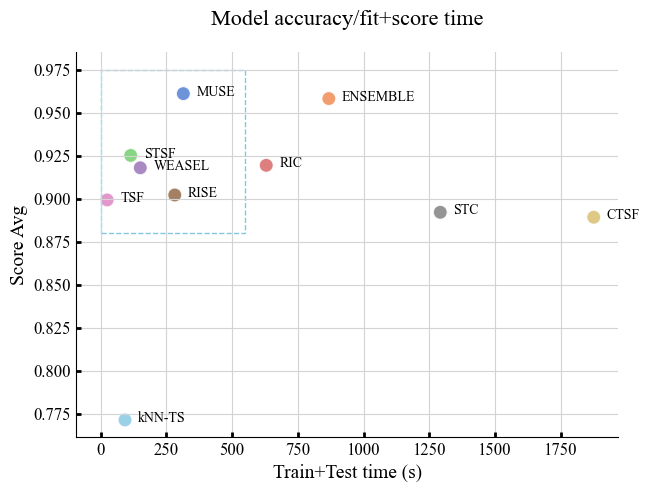

In [29]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.set_title('Model accuracy/fit+score time', fontsize=16, pad=20)

sns.scatterplot(y='Score Avg', x='Train+Test time (s)',
                hue='Classifier',
                data=scatter_data,
                alpha=0.8, palette=cmap,
                s=100, ax=ax);
ax.legend(bbox_to_anchor=(1.05, 1.01), loc="upper left")
ax.grid()
ax.legend().remove()

label_point(scatter_data['Train+Test time (s)'], 
            scatter_data['Score Avg'], 
            sorted_results.Classifier, plt.gca())
rect = matplotlib.patches.Rectangle((0, 0.88),550,0.095, 
                                    fc='none',
                                    #alpha=0.2,
                                    color=THEMA_COLOR,
                                    linewidth = 1,
                                    linestyle='--')
ax.add_patch(rect)

<a id="212"></a> <br>
#### [▲](#21) 2A.2 - Misclassification analysis

**Classification results by models**

In [30]:
preds_csv_filename = os.listdir(preds_filepath)[-1] # Get the last one from the files
preds_csv_filename

'preds_datasetup_b_D20230504_T1944.csv'

In [31]:
preds_from_csv = pd.read_csv(preds_filepath + preds_csv_filename)
target_from_csv = pd.read_csv('DATA/case_data/TEST-DATA_CASE-D20230424_T1718').iloc[:,-1]

In [32]:
preds_copy = preds_from_csv.copy()
preds_copy['Valid'] = target_from_csv
preds_copy['Errors'] = 0
# Counting misclassified cases
for i in range(0, preds_copy.shape[0]):
    mistakes = (preds_copy.iloc[i,0:-1] != preds_copy.loc[i]['Valid']).sum()
    preds_copy.loc[i,'Errors'] = mistakes
preds_copy_sorted = preds_copy.sort_values('Errors', ascending=False).head(8)
preds_copy_sorted.style.background_gradient(subset='Errors', cmap=sns.light_palette("skyblue", as_cmap=True))\
                .format(precision=0)

,TSF,STSF,RISE,RIC,STC,kNN-TS,CTSF,WEASEL,MUSE,ENSEMBLE,Valid,Errors
71,0,0,0,0,0,0,0,0,0,0,1,10
62,0,0,0,0,0,0,0,0,0,1,1,9
208,1,1,1,1,1,2,1,0,1,1,0,9
97,1,1,1,1,1,1,1,0,0,1,0,8
220,1,1,1,1,1,1,1,1,2,2,2,8
138,1,1,1,2,1,1,1,2,1,2,2,7
195,1,1,1,1,1,2,1,1,2,2,2,7
17,2,0,1,0,1,1,1,1,0,0,0,6


In [33]:
int(statistics.mode(preds_copy.iloc[71,:5]))

0

**Feature vectors for the whole dataset for analysis**

> Download data

- *Data was saved to separate files for each feature HR, SPEED, and ALTITUDE (in Part 2/3 TSC, in context of M-TSC)*
- *On these files data is segmented and has shape of `1160x69`, for each*

In [34]:
hr_std = pd.read_csv('DATA/HR-DATA_std_1160x69')
spd_std = pd.read_csv('DATA/SPD-DATA_std_1160x69')
alt_std = pd.read_csv('DATA/ALT-DATA_std_1160x69')
target = pd.read_csv('DATA/TARGET-DATA_1160x1')
#muva = pd.read_csv('DATA/MULVA_1160x69x3_target')

> Create descriptive signals from the data

*Here we may create some mean signals etc. in order to compare misclassified signals to them*

In [35]:
# Let's get indexes for activities
run_index = target[target.label == 'Running'].index.tolist()
bike_index = target[target.label == 'Biking'].index.tolist()
oth_index = target[target.label == 'Other'].index.tolist()

In [36]:
# Creating mean value signals by features, just for fun (For classification this is not relevant)
hr_mean = hr_std.mean()
spd_mean = spd_std.mean()
alt_mean = alt_std.mean()

In [37]:
hr_std

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,-1.291614,-1.242833,-1.194051,-1.291614,-1.145270,-1.194051,-1.194051,-1.194051,-1.340395,-1.340395,...,-2.267240,-2.364803,-2.364803,-2.316021,-2.413584,-2.316021,-2.218459,-2.218459,-2.072115,-2.120896
1,-2.072115,-2.169677,-1.925771,-1.730646,-1.486739,-1.389177,-1.389177,-1.389177,-1.486739,-1.486739,...,-2.511146,-2.559928,-2.559928,-2.608709,-2.657490,-2.755053,-2.657490,-2.413584,-2.218459,-1.925771
2,-2.023334,-1.876990,-2.023334,-1.876990,-1.730646,-1.584302,-1.828208,-1.828208,-1.828208,-1.876990,...,-2.169677,-2.072115,-2.120896,-2.169677,-2.120896,-2.072115,-2.072115,-2.169677,-2.023334,-1.876990
3,-2.023334,-1.925771,-1.925771,-1.876990,-1.876990,-1.828208,-1.779427,-1.730646,-1.828208,-1.876990,...,-1.681864,-1.779427,-1.779427,-1.828208,-1.828208,-1.681864,-1.633083,-1.486739,-1.389177,-1.291614
4,-1.340395,-1.340395,-1.340395,-1.291614,-1.291614,-1.291614,-1.291614,-1.291614,-1.291614,-1.291614,...,-0.462332,-0.315988,-0.364769,-0.413551,-0.413551,-0.559895,-0.608676,-0.657457,-0.852582,-0.901364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,-2.608709,-2.608709,-2.559928,-2.462365,-2.462365,-2.413584,-2.462365,-2.511146,-2.511146,-2.511146,...,-2.072115,-2.072115,-2.072115,-2.072115,-2.169677,-2.169677,-2.218459,-2.218459,-2.218459,-2.218459
1156,-2.169677,-2.023334,-1.974552,-2.120896,-2.267240,-2.364803,-2.413584,-2.413584,-2.218459,-2.120896,...,-0.511113,-0.462332,-0.413551,-0.364769,-0.413551,-0.364769,-0.364769,-0.315988,-0.315988,-0.315988
1157,-0.267207,-0.267207,-0.218426,-0.169644,-0.218426,-0.169644,-0.120863,-0.072082,-0.072082,-0.072082,...,0.269387,0.318169,0.318169,0.318169,0.269387,0.318169,0.318169,0.318169,0.318169,0.318169
1158,0.366950,0.318169,0.366950,0.366950,0.318169,0.318169,0.318169,0.269387,0.318169,0.269387,...,0.513294,0.513294,0.513294,0.513294,0.464513,0.464513,0.464513,0.464513,0.464513,0.464513


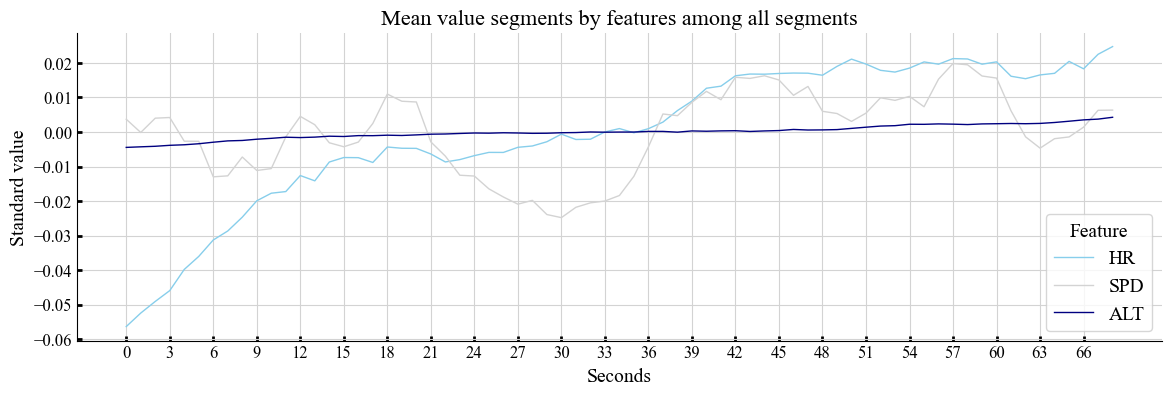

In [38]:
# Plotting mean value signals
fig, ax = plt.subplots(1,1, figsize=(14,4))
ax.plot(hr_mean, label='HR')
ax.plot(spd_mean, label='SPD')
ax.plot(alt_mean, label='ALT')
ax.set_xticks(np.arange(0,69,3))
plt.grid()
plt.title('Mean value segments by features among all segments')
plt.xlabel('Seconds')
plt.ylabel('Standard value')
plt.legend(title='Feature')

> HR segments by categories

In [39]:
# Let's take mean values for each category separately in HR data
hr_run_mean = hr_std.iloc[run_index].mean()
hr_bike_mean = hr_std.iloc[bike_index].mean()
hr_oth_mean = hr_std.iloc[oth_index].mean()

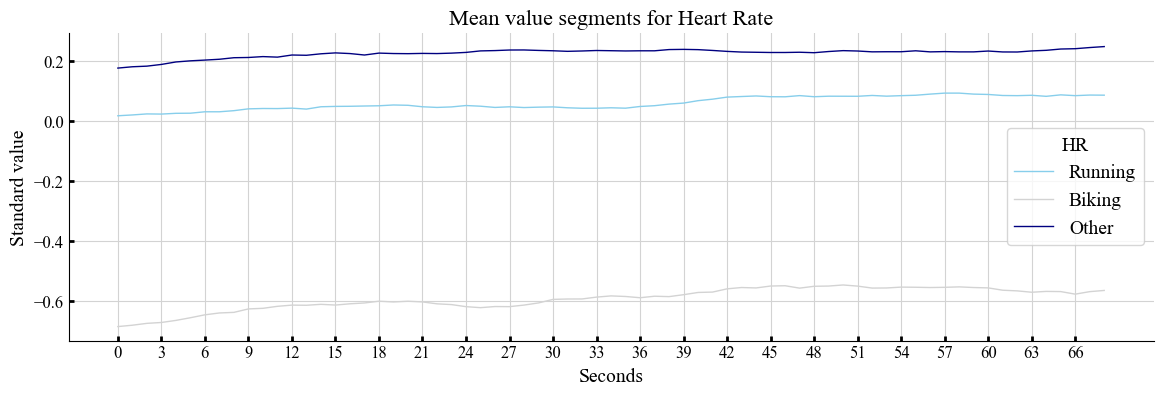

In [40]:
# Plotting HR mean value vectors by categories
fig, ax = plt.subplots(1,1, figsize=(14,4))
ax.plot(hr_run_mean, label='Running')
ax.plot(hr_bike_mean, label='Biking')
ax.plot(hr_oth_mean, label='Other')
ax.set_xticks(np.arange(0,69,3))
plt.grid()
plt.title('Mean value segments for Heart Rate')
plt.xlabel('Seconds')
plt.ylabel('Standard value')
plt.legend(title='HR')

> Mean feature signals with confidence intervals

*Right now this is something else, encountered problems when creating those confidence intervals*

In [41]:
cmap

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

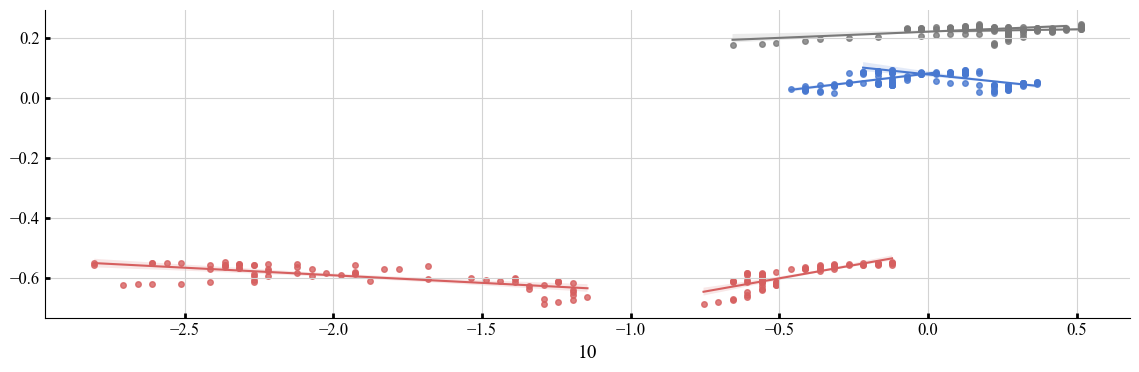

In [42]:
fig, ax = plt.subplots(1,1, figsize=(14,4))
sns.regplot(x=hr_std.iloc[run_index[0]], y=hr_run_mean, ci=95, color=cmap[0], ax=ax)
sns.regplot(x=hr_std.iloc[bike_index[0]], y=hr_bike_mean, ci=95, color=cmap[3], ax=ax)
sns.regplot(x=hr_std.iloc[oth_index[0]], y=hr_oth_mean, ci=95, color=cmap[7], ax=ax)

sns.regplot(x=hr_std.iloc[run_index[5]], y=hr_run_mean, ci=95, color=cmap[0], ax=ax)
sns.regplot(x=hr_std.iloc[bike_index[5]], y=hr_bike_mean, ci=95, color=cmap[3], ax=ax)
sns.regplot(x=hr_std.iloc[oth_index[5]], y=hr_oth_mean, ci=95, color=cmap[7], ax=ax)
plt.grid()

**Analysing misclassified signals using actual test data**

> Download test data

*NOTE: It is important to have the same test data with corresponding indexes as used for misclassification analysis*

In [43]:
# This test data was used for model testing
test_data = pd.read_csv('DATA/case_data/TEST-DATA_CASE-D20230424_T1718')

In [44]:
x_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

*Scale the data*

In [45]:
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)

*Plot the data*

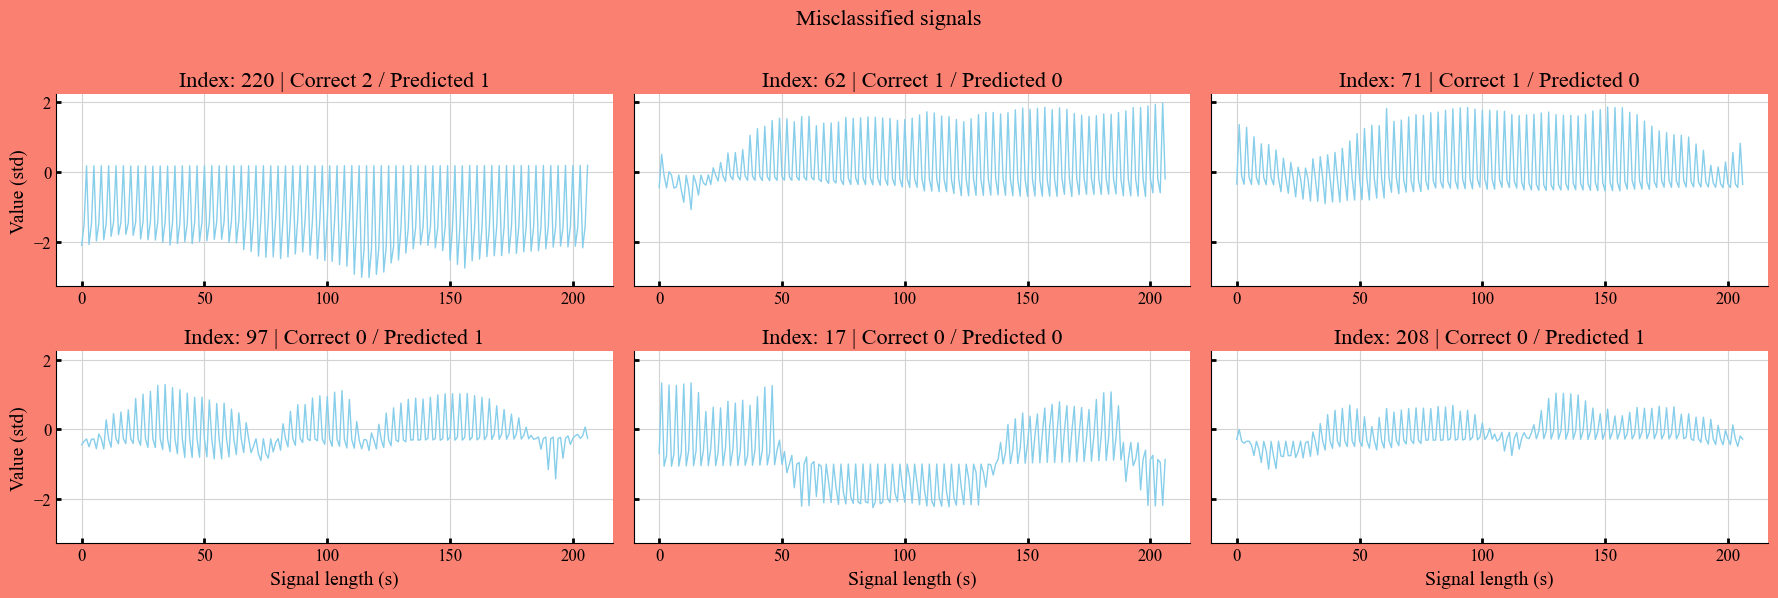

In [46]:
# Indexes of misclassified segments picked manually from the misclassification table
idxs = [220,62,71,97,17,208]

fig, axs = plt.subplots(2,3, figsize=(18,6), facecolor='salmon', sharey=True)
fig.suptitle('Misclassified signals', y=1.0, fontsize=16)

for i, ax in enumerate(axs.flat):
    ax.plot(x_test[idxs[i]], lw=1)
    ax.set_title("Index: %d | Correct %d / Predicted %d" % (idxs[i], y_test[idxs[i]], int(statistics.mode(preds_copy.iloc[idxs[i],:5]))))
    ax.grid()

plt.setp(axs[-1,:], xlabel='Signal length (s)')
plt.setp(axs[:,0], ylabel='Value (std)')
plt.tight_layout()
plt.show()

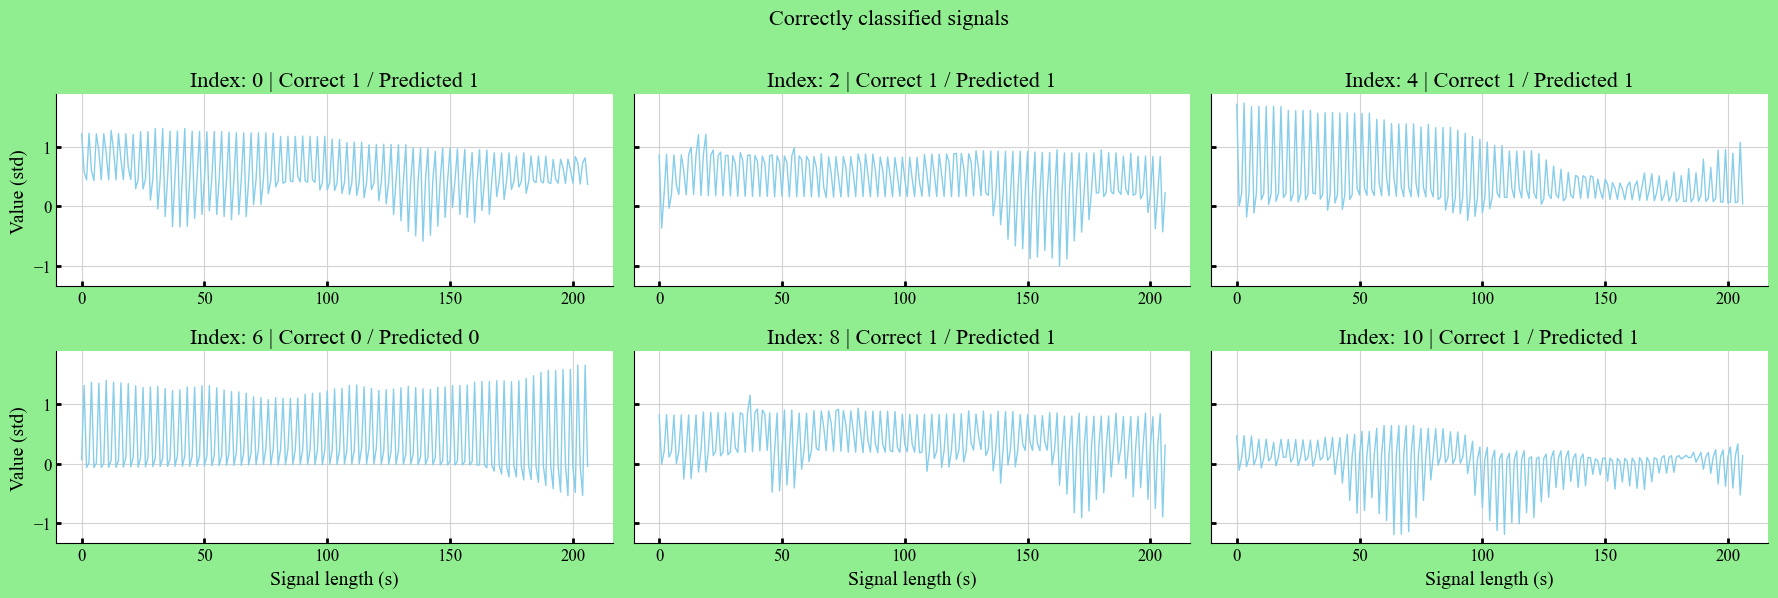

In [47]:
idxs_correct = preds_copy[preds_copy['Errors'] == 0][:6].index

fig, axs = plt.subplots(2,3, figsize=(18,6), facecolor='lightgreen', sharey=True)
fig.suptitle('Correctly classified signals', y=1.0, fontsize=16)

for i, ax in enumerate(axs.flat):
    ax.plot(x_test[idxs_correct[i]], lw=1)
    ax.set_title("Index: %d | Correct %d / Predicted %d" % (idxs_correct[i], y_test[idxs_correct[i]], int(statistics.mode(preds_copy.iloc[idxs_correct[i],:5]))))
    ax.grid()

plt.setp(axs[-1,:], xlabel='Signal length (s)')
plt.setp(axs[:,0], ylabel='Value (std)')
plt.tight_layout()
plt.show()

<a id="213"></a> <br>
### [▲](#21) 2A.3 - Model Correlation, similarity/distance metrics

In [48]:
preds_copy

,TSF,STSF,RISE,RIC,STC,kNN-TS,CTSF,WEASEL,MUSE,ENSEMBLE,Valid,Errors
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1.0,0
1,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0,1,0.0,3
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1.0,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1,1.0,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
227,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2,2,2.0,2
228,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0,0,0.0,2
229,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1.0,0
230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0


> Plot correlation matrix from the prediction results

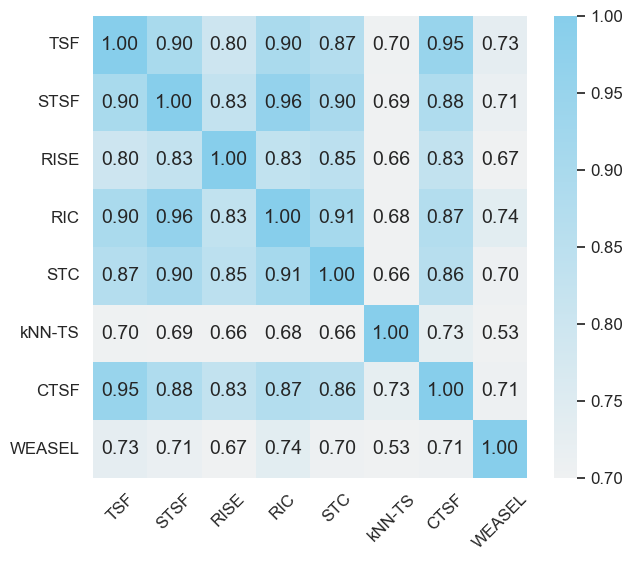

In [59]:
# Prepare correlation matrix
corr_data = preds_copy.iloc[:,:-4].corr()
# Plot matrix
plt.figure(figsize=(7,6))
sns.set(font_scale=1.1) # for label size
g = sns.heatmap(corr_data, vmin=0.7, vmax=1.0, 
                annot=True, 
                cmap=sns.light_palette("skyblue", as_cmap=True),
                fmt='.2f',
                cbar=True,
                annot_kws={"size": 14})
g.tick_params(axis='x', rotation=45)
g.tick_params(axis='y', rotation=0)

> Cramer's V association

**Estimating Cramer’s V association among nominal variables**

In statistics, Cramér’s V (sometimes referred to as Cramér’s phi and denoted as φc) is a measure of association between two nominal variables [3]. The value ranges 0 to 1, where 0 indicates no association and 1 indicates a perfect association.

Cramer’s V facts:
- The value ranges between 0 and 1
- It is a symmetrical association measure [V(x, y) = V(y, x)]

(https://medium.com/the-researchers-guide/generate-numerical-correlation-and-nominal-association-plots-using-python-c8548aa4a663)

In [50]:
import association_metrics as am

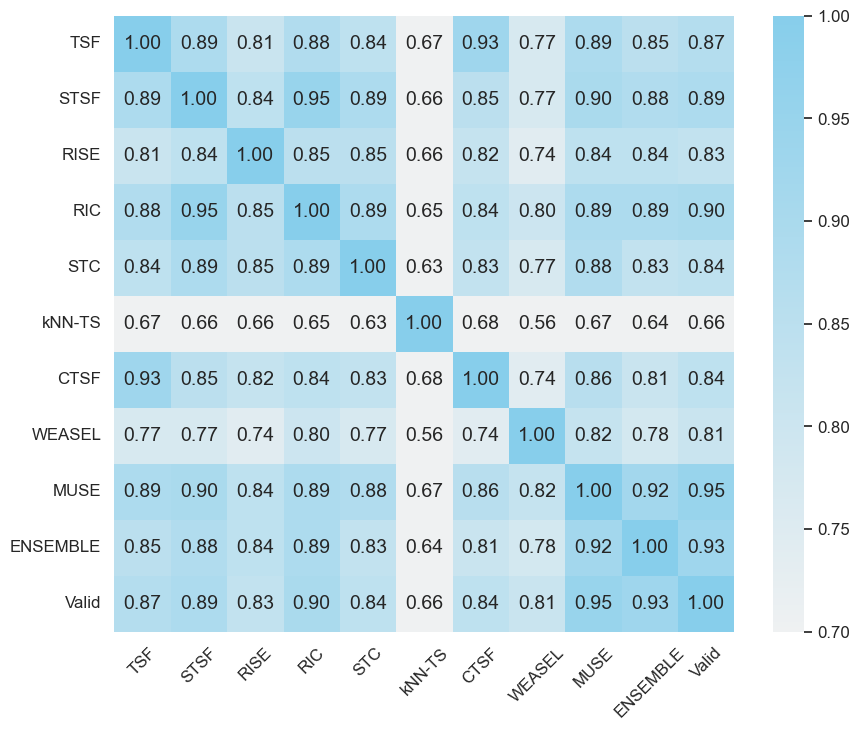

In [62]:
# Convert object columns to Category columns
df = preds_copy.iloc[:,:-1]
df = df.apply(lambda x: x.astype("category"))
# Initialize a CramersV object using the pandas.DataFrame (df)
cramers_v = am.CramersV(df)
# It will return a pairwise matrix filled with Cramer's V, where 
# columns and index are the categorical variables of the passed     # pandas.DataFrame
cfit = cramers_v.fit().round(2)

# Plot matrix
plt.figure(figsize=(10,8))
sns.set(font_scale=1.1) # for label size
g = sns.heatmap(cfit, vmin=0.7, vmax=1.0, 
                annot=True, 
                cmap=sns.light_palette("skyblue", as_cmap=True),
                fmt='.2f',
                cbar=True,
                annot_kws={"size": 14})
g.tick_params(axis='x', rotation=45)
g.tick_params(axis='y', rotation=0)

> Hamming Distance matrix

In information theory, the Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. In other words, it measures the minimum number of substitutions required to change one string into the other, or the minimum number of errors that could have transformed one string into the other. In a more general context, the Hamming distance is one of several string metrics for measuring the edit distance between two sequences. It is named after the American mathematician Richard Hamming. 

(Wikipedia, https://en.wikipedia.org/wiki/Hamming_distance)

In [52]:
from scipy.spatial.distance import hamming

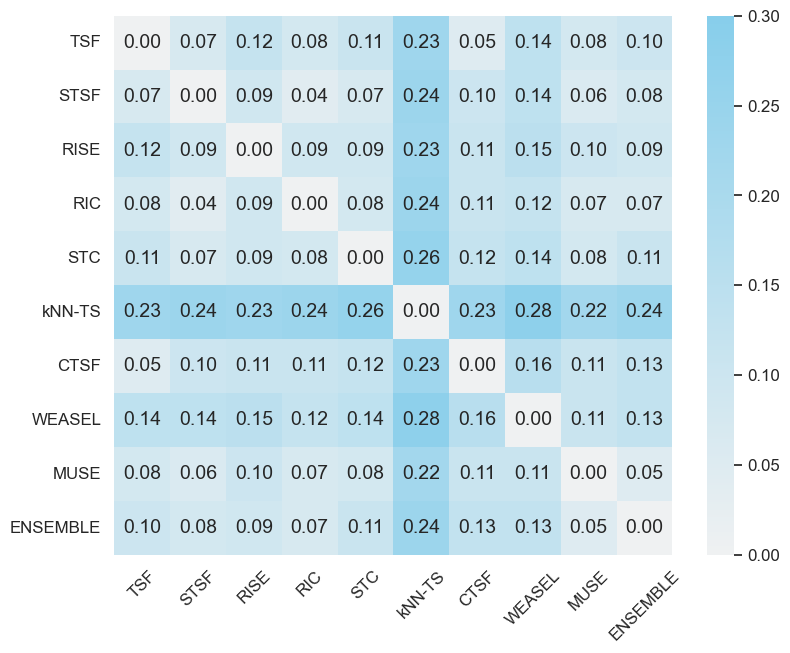

In [63]:
hamms = np.zeros((10,10))

for i in np.arange(0,10):
    for j in np.arange(0,10):
        hamms[i,j] = hamming(preds_copy.iloc[:,i],preds_copy.iloc[:,j],)

hamms = hamms.round(2)
hamms_df = pd.DataFrame(data=hamms,columns=preds_copy.columns[0:10])
# Plot matrix
plt.figure(figsize=(9,7))
sns.set(font_scale=1.1) # for label size
g = sns.heatmap(hamms_df, vmin=0.0, vmax=0.3, 
                annot=True, 
                cmap=sns.light_palette("skyblue", as_cmap=True),
                fmt='.2f',
                cbar=True,
                annot_kws={"size": 14})

g.set_yticks(np.arange(0,10)+0.5,preds_copy.columns[0:10])
g.tick_params(axis='x', rotation=45)
g.tick_params(axis='y', rotation=0)

**Example**

If accuracy of MUSE is 96.6% and accuracy of STSF is 93.1% it implies that:

- maximum hamming distance between the models is $(100-93.1)+(100-96.6)=6.9+3.4=10.3%$ 
- minimum hamming distance is $(100-93.1)-(100-96.6)=6.9-3.4=3.5%$

The Hamming distance between 1-D arrays u and v, is simply the proportion of disagreeing components in u and v. If u and v are boolean vectors, the Hamming distance is

$\frac{C_{01}+C_{10}}{n}$ which means $\frac{mismatches}{number-of-instances}$

And if the test data size is 232, there is diagreeing components of
* max $0.103*232≈24$
* min $0.035*232≈7$
* Summary: hamming distance must be $[0.035, 0.103]$

The produced result 0.06 seems to be correct

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.hamming.html



<a id="22"></a> <br>
### [▲](#1) 2B - Multivariate TSC

This analysis is combined with Univariate TSC analysis for now

---

### TEST - Pairwise comparison of STSF model

In [54]:
SPORT_CODES = {0:"Biking", 1:"Running", 2:"Other"}
comb_models = preds_copy.columns[:-2].drop('STSF')
labels, counts = np.unique(y_test, return_counts=True)
print(labels, counts)

[0. 1. 2.] [ 49 109  74]


**McNemar’s Test**

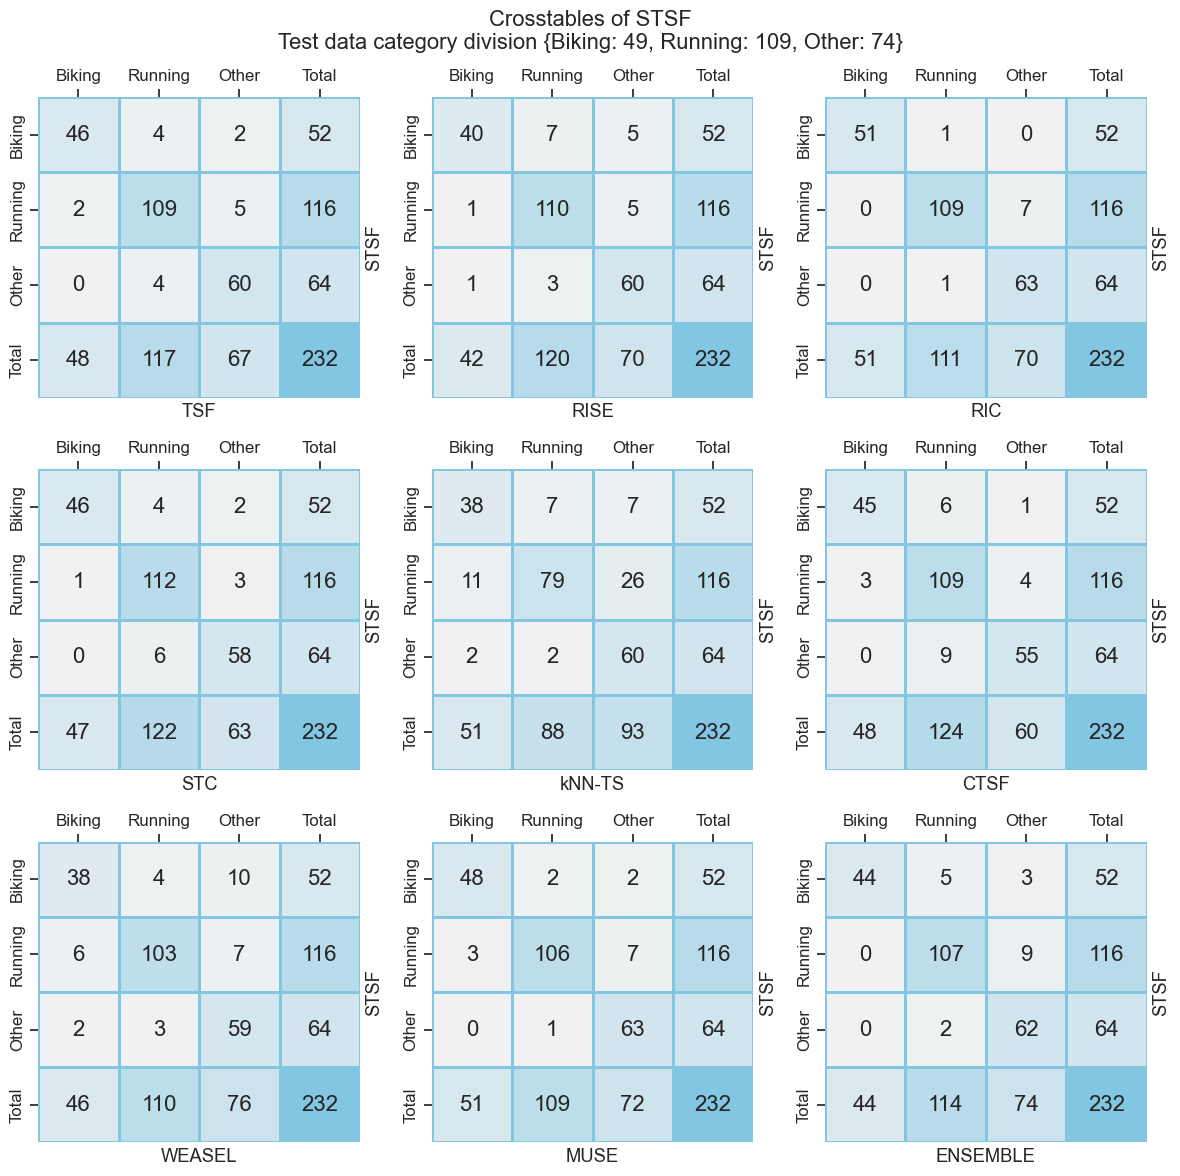

In [55]:
fig, axs = plt.subplots(3,3,figsize=(12,12), tight_layout=True)
fig.suptitle('Crosstables of STSF\nTest data category division {Biking: 49, Running: 109, Other: 74}')

labels = list(SPORT_CODES.values())
labels.append('Total')

for i, ax in enumerate(axs.flat):
    comp_model = comb_models[i]
    
    data_crosstab = pd.crosstab(preds_copy['STSF'],
                                preds_copy[comp_model],
                                margins=True, margins_name='Total', 
                                normalize=False
                                )
    #data_crosstab = data_crosstab*100
    
    sns.heatmap(data_crosstab,
                #vmin=0, vmax=1
                annot=True,
                cmap=sns.light_palette(THEMA_COLOR, as_cmap=True),
                fmt='.0f',
                cbar=False,
                linewidths=1, linecolor=THEMA_COLOR,
                annot_kws={"size": 16},
                ax=ax)
    
    ax.set_yticks(np.arange(0,4)+0.5,labels)
    ax.set_xticks(np.arange(0,4)+0.5,labels)
    ax.xaxis.tick_top()
    ax.yaxis.tick_left()
    ax.yaxis.set_label_position('right')
    
plt.show()

In [56]:
data_crosstab

ENSEMBLE,0,1,2,Total
STSF,,,,
0.0,44,5,3,52
1.0,0,107,9,116
2.0,0,2,62,64
Total,44,114,74,232
